# Task 1 - CUSTOMER PERSONALITY ANALYSIS

- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

-------------------------------------------------------------------------------------------------------------------------------

- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
#Importing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing pandas rules 

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Reading Dataset

In [4]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Cleaning Dataset

In [8]:
#Checking for any missing data

df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [9]:
#Finding out the missing percentage
#24 Income columns are missing from 2240, therefore the percentage is - 

24/2240*100.00

1.0714285714285714

- From the above we can see that only 1% of data is missing from the Income column. 
- In that case we can fill the missing columns, so that we can perform EDA for exciting insights.
- In order to fill the data we need to find out the distribution of the dataset in order to determine if we can fill the missing spots with mean or median.

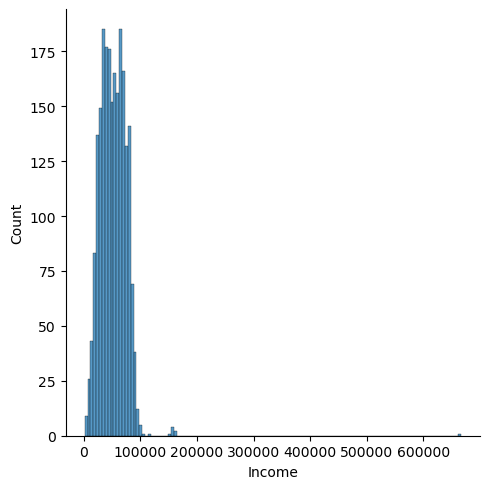

In [10]:
#Checking if the dataset is normal distrbution or not 

sns.displot(df['Income'])
plt.show()

In [11]:
#Finding out the skewness of the dataset

df.Income.skew()

6.763487372811116

- We have observed that the dataset is positively skewed and greater than 0, we can conclude that the dataset is not a normally distributed data.
- In that case, we have to fill the missing columns with the median of the 'Income' column as - 
    
    - When data has normal distribution - Fill with mean 
    - When data has not a normal distribution - Fill with median

In [12]:
#Median of Income Column

df.Income.median()

51381.5

In [13]:
df.Income.fillna(df.Income.median(), inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- We have successfully filled the Income column. 
- Let us look at few determinatory columns for outliers and adjust them

# Data Engineering and Outlier Detection

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


- We will assume that the survey was completed in 2023 and we will find out the age of the consumers now 

In [15]:
import datetime as dt
df['Age'] = 2023 - df.Year_Birth

- We will sum total all of the spendings together in one column for the ease of reading  

In [16]:
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

- We will divide the age groups as per the age of the consumers present

In [17]:
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

- For better understanding we would add the kidhome and teenhome as data is provided separately for children and young people in the home for each customer 
- So the sum total of the componenents would provide the number of children.  

In [18]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [19]:
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

- Upon seeing the Marital Status column it can be concluded that the there are many particulars and it can lead to confusion among the readers.
- To tackle that we can categorize these people into Single and Partner.

In [20]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1617,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,27,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,776,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,53,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,422,Middle Age Adult,1


- From the customer registration date we can find out from how long the consumers are registered with the company.
- We will convert the data on a month duration so that's easy for us to draw insights.

In [22]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format= 'mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [46]:
df['Month_Customer'] = 12.0 * (2023 - df.Dt_Customer.dt.year ) + (1 - df.Dt_Customer.dt.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1617,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,27,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,776,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,53,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,422,Middle Age Adult,1


- Now let us detect outliers from the below columns 
  - Age
  - Income
- Kindly note that the we are checking for outliers in these columns as Age/Income would play a big role in our analysis as these two columns are the determining factor

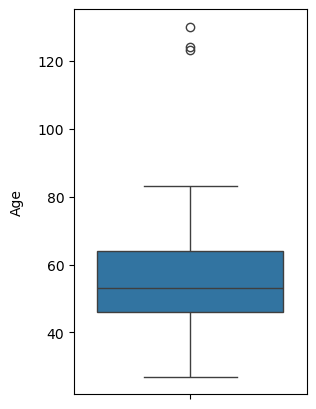

In [24]:
#Age 

plt.figure(figsize=(3,5))
sns.boxplot(y=df.Age)
plt.ylabel('Age', fontsize=10, labelpad=10)
plt.show()

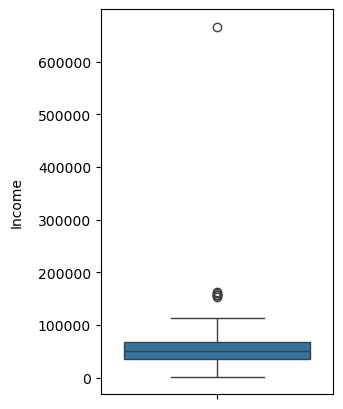

In [25]:
#Income 

plt.figure(figsize=(3,5))
sns.boxplot(y=df.Income)
plt.ylabel('Income', fontsize=10, labelpad=10)
plt.show()

Notes - 

- From the 'Age' boxplot, we have observed that there are few people who are older than 100 years and it is factually impossible that they are actual data. 
- From the 'Income' boxplot we have observed that there are few consumers who earn more than 600000 and way above the chart. 

We can conclude that these plots are nothing but 'Outliers' and we have to discard from our dataset so that we do not skew our observation and analysis. 

In [26]:
#removing outliers
df = df[df.Age < 100]
df = df[df.Income < 120000]

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1617,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,27,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,776,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,53,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,422,Middle Age Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,56,1341,Middle Age Adult,1
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,77,444,Senior Adult,3
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,42,1241,Middle Age Adult,0
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,67,843,Senior Adult,1


# Data Analysis - Using EDA

- Let us start with the basics and analyse the dataset using Univariate Analysis. 
- We will read few columns individually and gather insights from them.

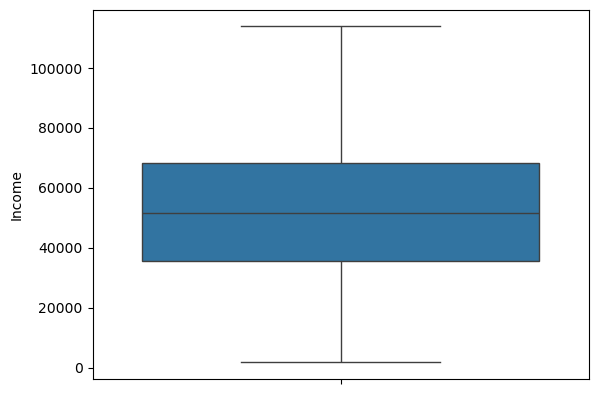

In [27]:
#Income level detection

sns.boxplot(df.Income)
plt.show()

INSIGHTS - 

- Median Income: The thick line inside the box represents the median income. It looks to be around 50,000.

- Interquartile Range (IQR): The box itself represents the interquartile range, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3). This is the middle of the data. The lower boundary of the box seems to be around 45,000, and the upper boundary seems to be around 65,000.

- Minimum and Maximum Income: The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR from the quartiles. It looks like the minimum income is just above 0, and the maximum income is around 100,000.

- Income Distribution: The spread of the box plot suggests that the majority of incomes are concentrated between 45,000 and 65,000, indicating a relatively moderate range of incomes within this dataset.

# Age Distribution of the Customers 

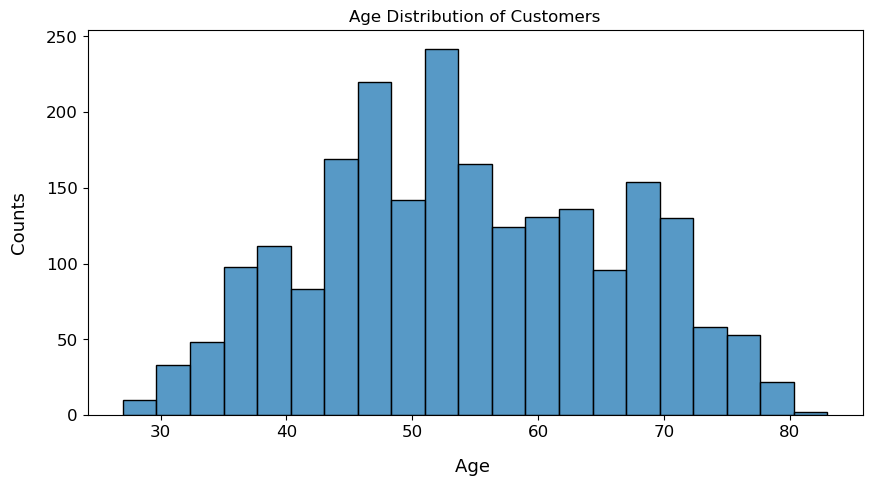

In [28]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df.Age)
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

INSIGHTS - 

- Most Common Age Range: The most common age range for customers appears to be between 45 and 55, with the highest bar around age 50. This suggests that the majority of customers fall within this age group.

- Distribution Shape: The distribution of ages is roughly symmetric with a slight skew to the right. This indicates that while there are more younger customers than older ones, the ages are fairly evenly spread out.

- Age Range: The age of customers ranges from approximately 25 to 85 years old, with a noticeable concentration in the middle ages (30-70 years old).

- Peak Age Group: The peak in the histogram occurs around the age of 50, indicating a significant number of customers in this age group. There are two noticeable peaks: one around the late 40s and another in the early 50s.

- Customer Segments: The histogram shows that there are multiple customer segments:

     - A younger segment in their 30s and early 40s.
     - A middle-aged segment around the late 40s and 50s.
     - An older segment in their 60s and 70s.
       
- Potential Targeting: Businesses targeting this customer base might focus on the age group of 45-55 for promotions and services, as they form the largest segment of the customer base.

# Education Level of the consumers

In [32]:
df.Education

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2229, dtype: object

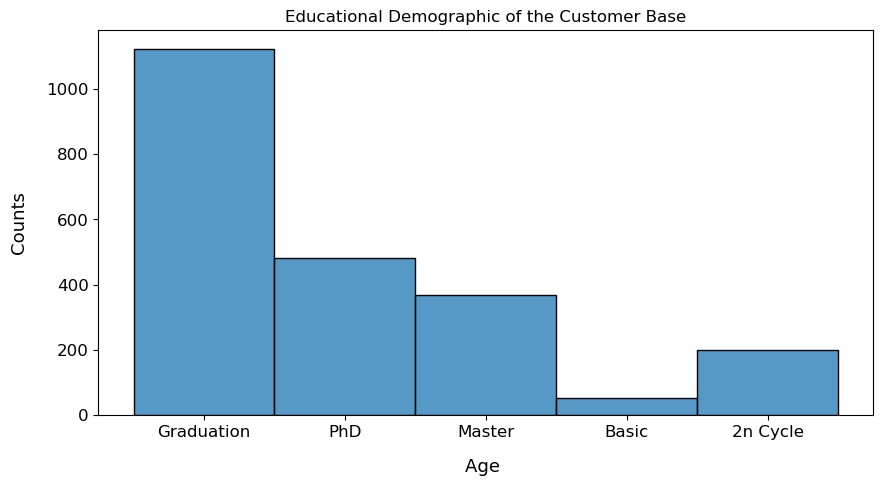

In [42]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df.Education)
ax.set(title = "Educational Demographic of the Customer Base");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

- Key Observations:

    - Highest Attainment: The largest segment of the customer base has a Graduation degree, with over 1,100 individuals.
    - Decreasing Trend: As the educational level increases, the number of individuals generally decreases. There are 475 individuals with a PhD, 375 with a Master's degree, and a smaller number with Basic and 2nd Cycle qualifications.
    - Distribution: The distribution is right-skewed, indicating a larger proportion of customers with lower educational attainment.


- Possible Insights:

    - Target Audience: The company may want to focus its marketing efforts on individuals with a Graduation degree, as they represent the largest customer segment.
    - Educational Outreach: Programs or initiatives aimed at individuals with higher educational qualifications (PhD, Master) could be beneficial for attracting new customers or enhancing customer engagement.
    - Product/Service Adaptation: The company may need to tailor its product or service offerings to cater to the diverse educational backgrounds of its customer base.

# Finding out Average Spending as per Marital Status - Using Bi-variate Analysis

In [47]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1617,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,27,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,776,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,53,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,422,Middle Age Adult,1


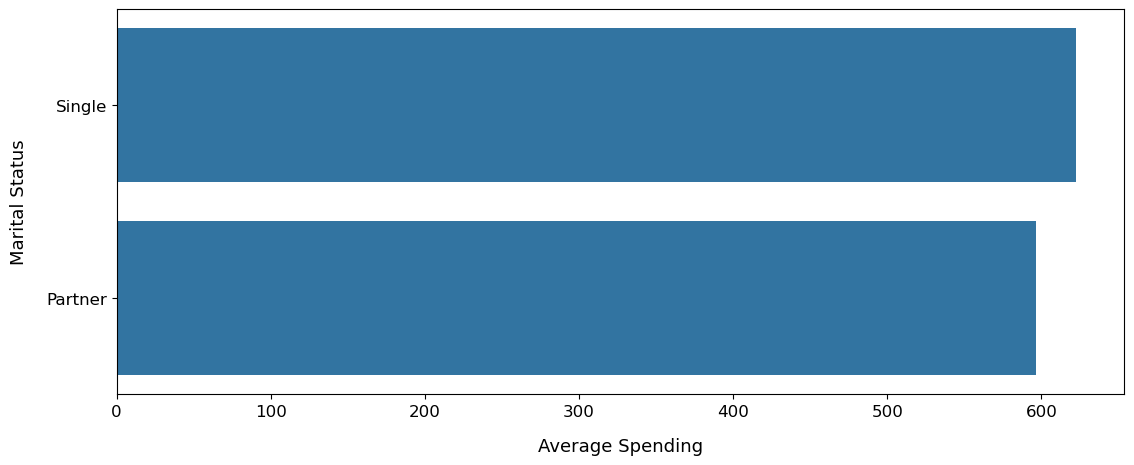

In [46]:
maritalspending = df.groupby('Marital_Status')['Spending'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(13,5))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Average Spending', fontsize=13, labelpad=13)
plt.ylabel('Marital Status', fontsize=13, labelpad=13);

INSIGHTS - 

- Spending Behavior: This chart indicates a distinct spending pattern between single and partnered individuals, with singles spending considerably more on average.

- Potential Factors: Several factors could contribute to this difference, such as lifestyle choices, financial responsibilities, and consumption habits.

- Target Audience: Businesses could potentially leverage this insight by tailoring marketing strategies and product offerings to cater to the unique spending behaviors of single and partnered customers.

# Finding out Average Spending as per Child wise data  - Using Bi-variate Analysis

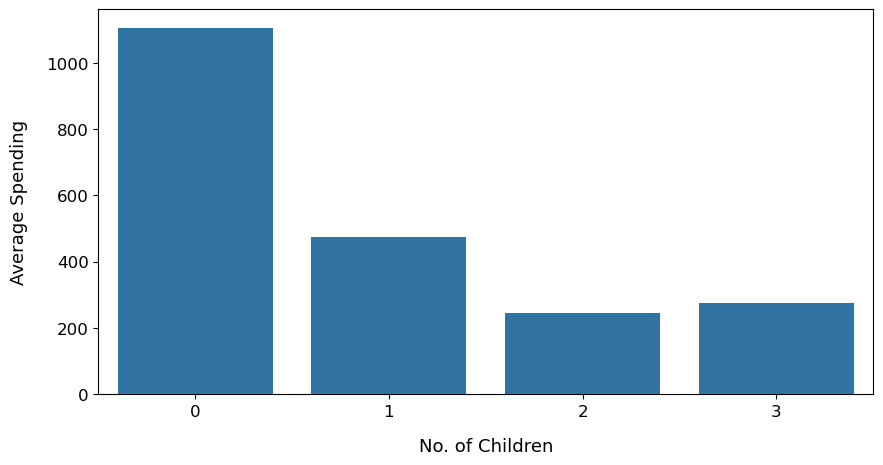

In [49]:
childrenspending = df.groupby('Children')['Spending'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

INSIGHTS - 

- Child-Related Expenses: Having children is associated with higher expenses, likely due to factors like childcare, education, and overall household needs.

- Spending Priorities: Households without children may have more disposable income to allocate towards discretionary spending.

- Potential Segmentation: Businesses could potentially segment their customer base based on the number of children to tailor marketing and product offerings accordingly.

# Finding out Relationship between Age and Spendings

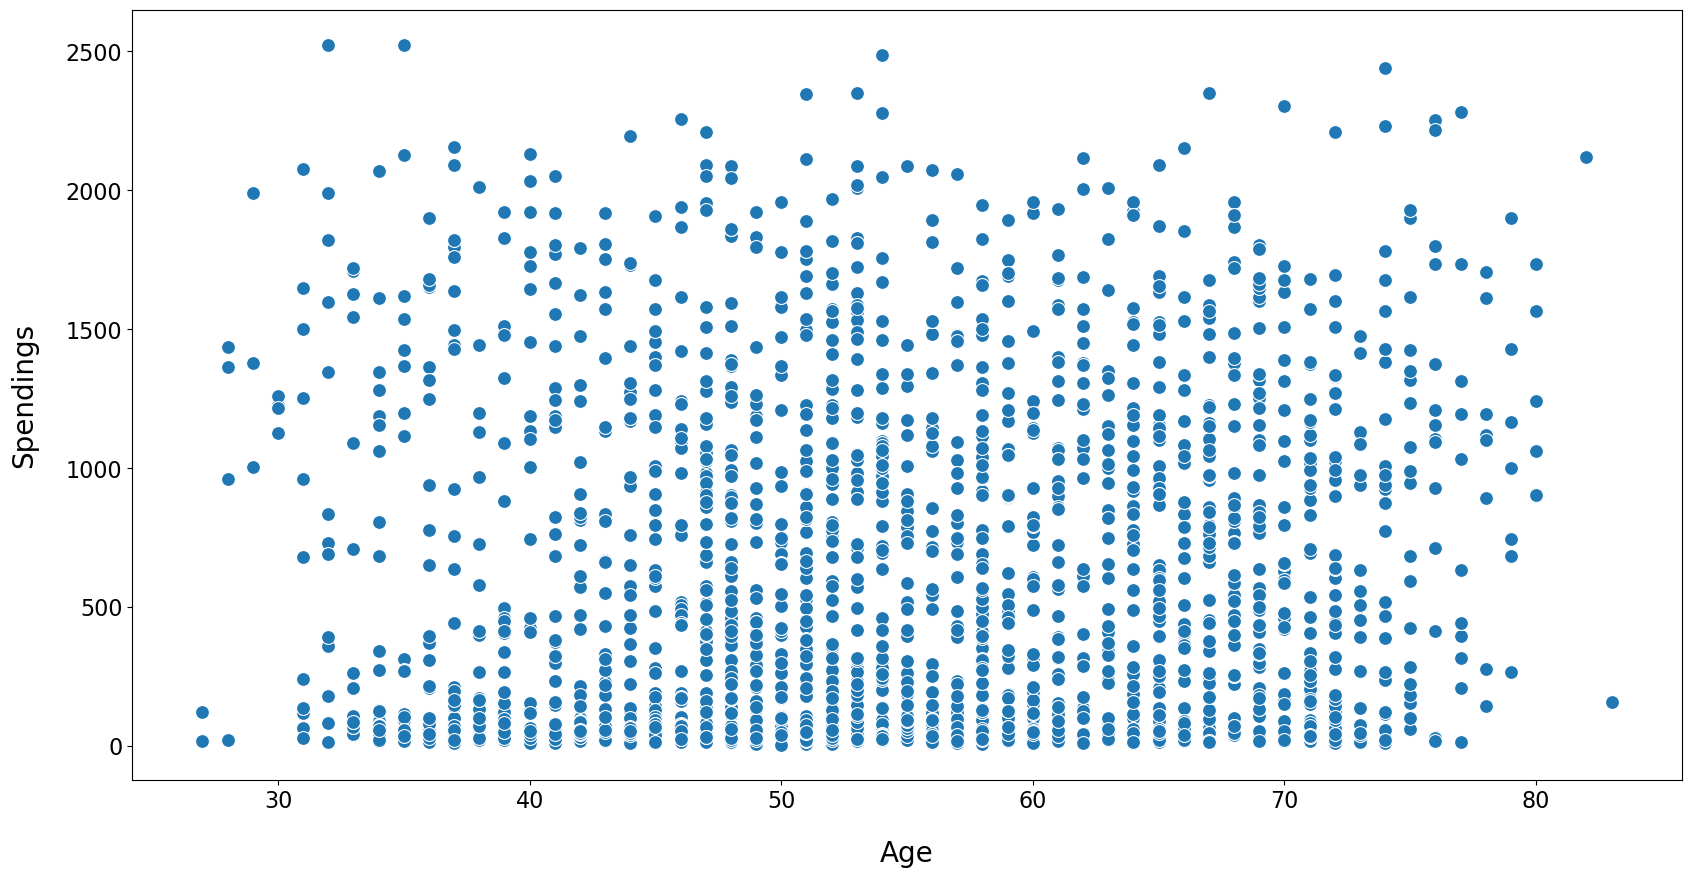

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df.Age, y=df.Spending, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

INSIGHTS - 

- Age is Not a Strong Predictor: Age alone is not a reliable predictor of spending in this dataset. Other factors likely influence spending behavior more significantly.


- Diverse Spending Patterns: People of all ages exhibit a wide range of spending habits, suggesting diverse needs and preferences.


- Potential Clusters: While not immediately apparent, there might be subtle patterns or clusters within the data that could be revealed through further analysis techniques like clustering algorithms.

# Finding out Relationship between Income and Spendings

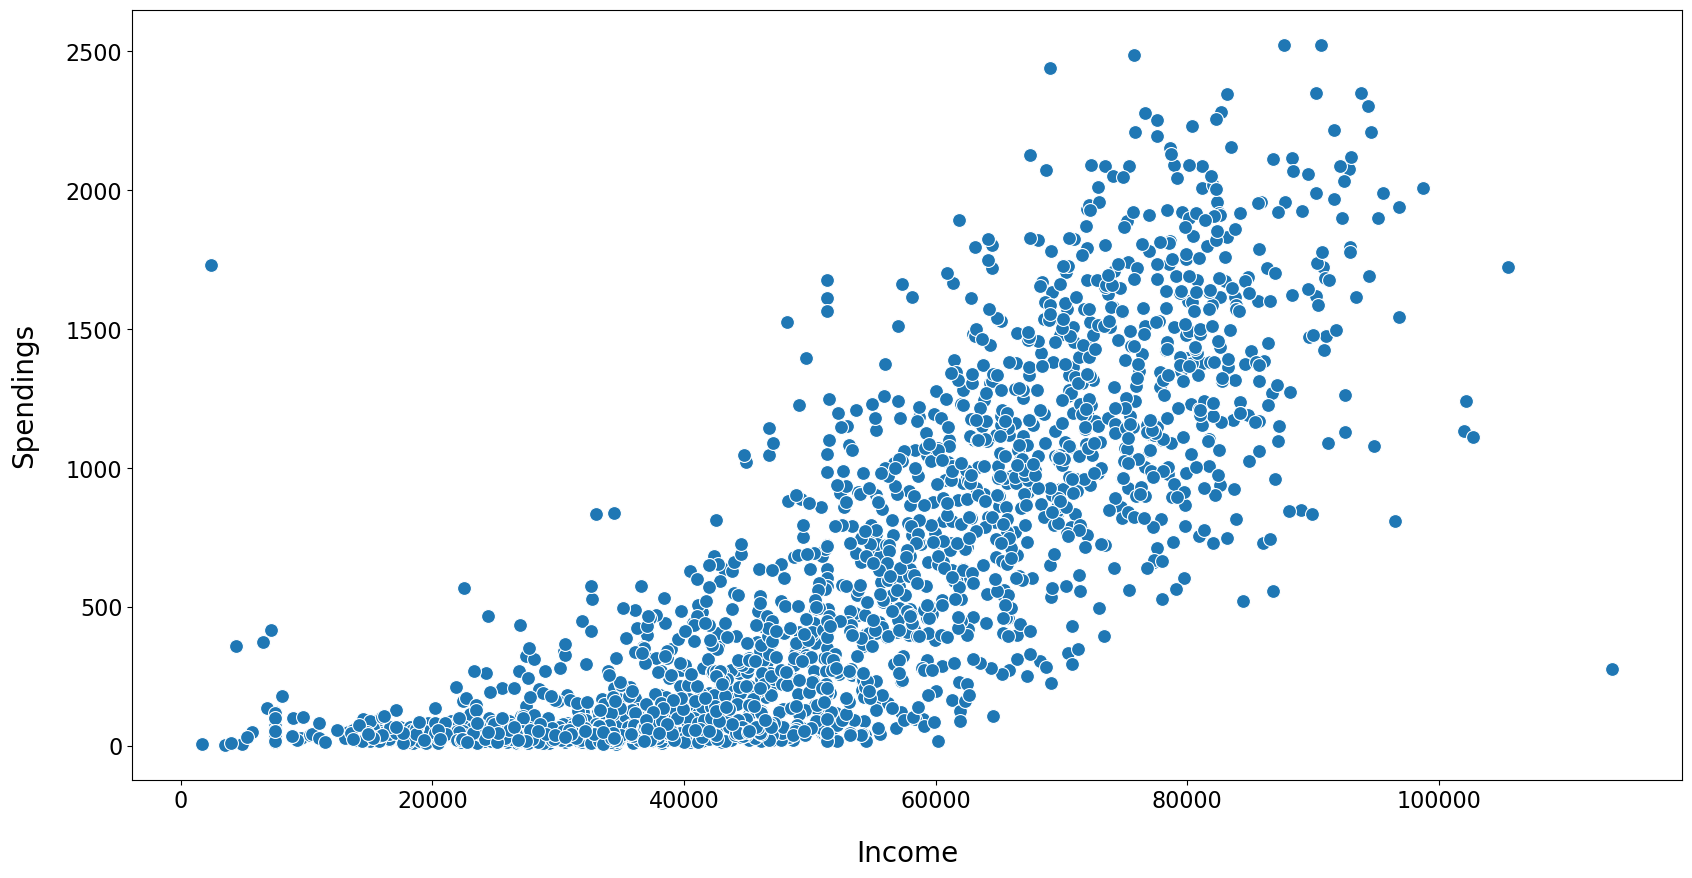

In [63]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=df.Income, y=df.Spending, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

INSIGHT 

- Income Influences Spending: The plot suggests that income is a contributing factor to spending levels. Individuals with higher incomes tend to spend more on average.


- Other Factors: While income is a significant factor, it's not the sole determinant of spending. Other variables, such as lifestyle, preferences, and financial habits, also play a role.


- Target Audience: Businesses could potentially use this information to identify target customer segments based on income and spending levels.

# Most Bought Products by the customer base

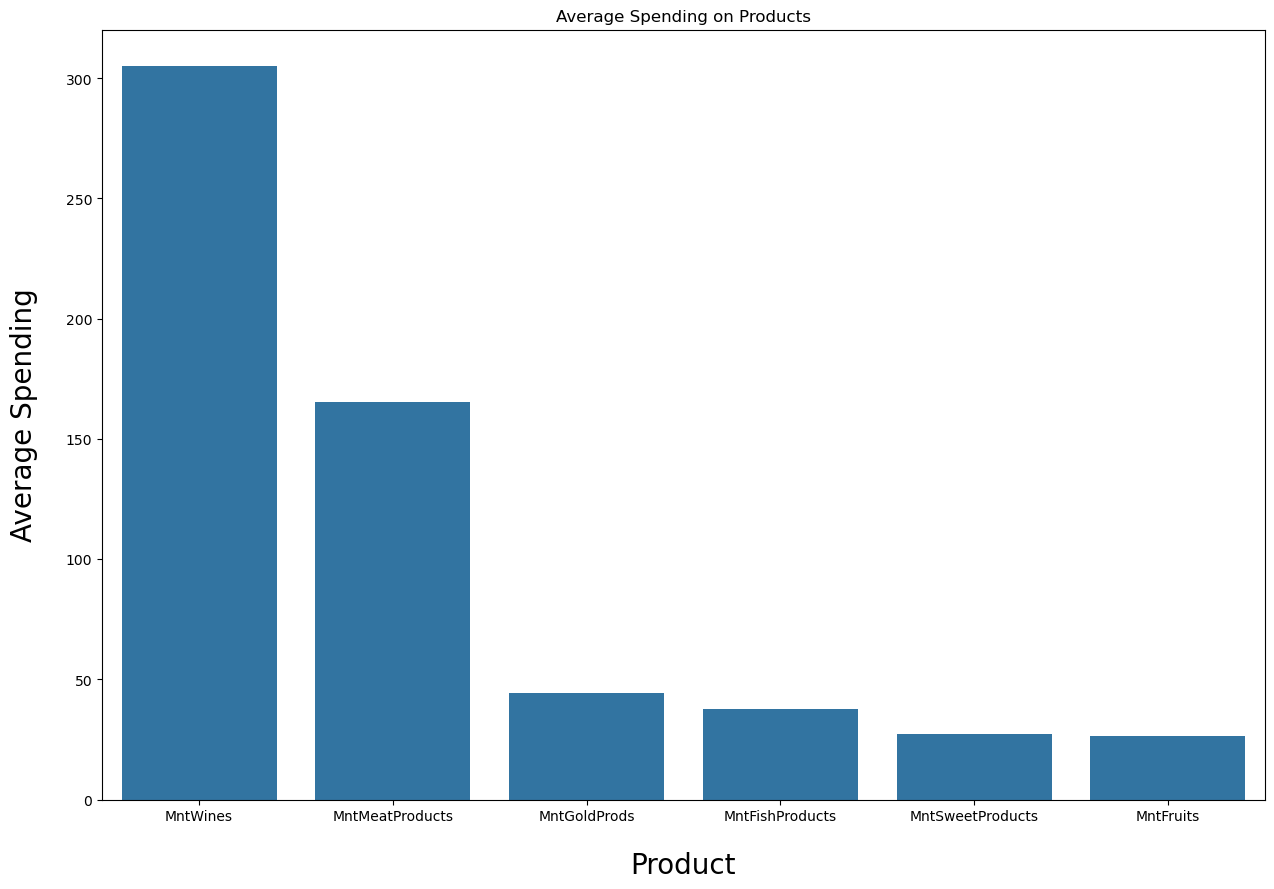

In [64]:
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

INSIGHTS - 

- Highest vs Lowest Purchase : We can see that the highest purchase for the last two years has been wine and the lowest being fruits. This provides a lifestyle analysis of the customer base as well. 

- Consumption of High Calorie food : We can see the second highest purchase is of Meat. This also provides a peep in the lifestye choices of the customer base.

- Marketing focus: The company might consider focusing marketing efforts on wine and meat products to maximize revenue.

# Correlation of the dataset

- Let us find the correlation between the decision making component of the dataset

In [67]:
df[['Age', 'Spending', 'Children', 'Income']].corr()

,Age,Spending,Children,Income
Age,1.000000,0.116090,0.095842,0.211432
Spending,0.116090,1.000000,-0.499513,0.820222
Children,0.095842,-0.499513,1.000000,-0.347199
Income,0.211432,0.820222,-0.347199,1.000000


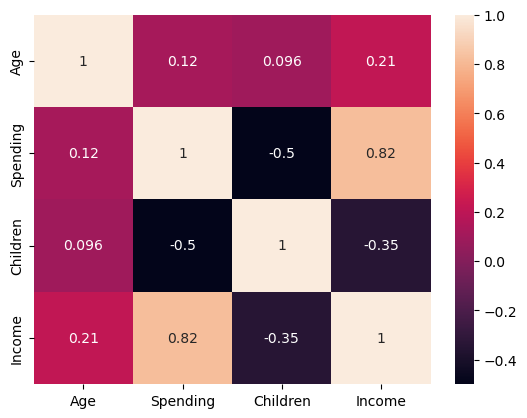

In [68]:
sns.heatmap(df[['Age', 'Spending', 'Children', 'Income']].corr(), annot=True)
plt.show()

INSIGHTS - 

- Income and Spending: There's a strong positive correlation (0.82) between income and spending, indicating that people with higher incomes tend to spend more.


- Children and Spending: A moderate negative correlation (-0.5) exists between children and spending, suggesting that households with more children tend to spend less.


- Age and Spending: A weak positive correlation (0.12) between age and spending implies that older people might spend slightly more, but this relationship is not very strong.


- Other Relationships: There are also correlations between other variables, such as a negative correlation between children and income, which could be explored further.

In [70]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1617,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,27,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,776,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,53,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,422,Middle Age Adult,1


# Promotion Analysis

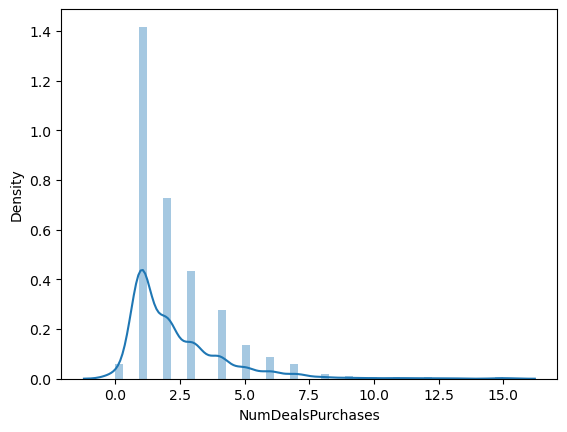

In [71]:
sns.distplot(df.NumDealsPurchases)
plt.show()

INSIGHTS - 

- Data Concentration: The data is concentrated in the lower range of "NumDealsPurchases," indicating that a majority of individuals or entities tend to have a limited number of deals and purchases.


- Potential Segmentation: The distinct peak suggests the possibility of segmenting the data into two groups: those with a low number of deals and purchases and those with a significantly higher number.